In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("lightcast_job_postings.csv")

/tmp/ipykernel_2393/3047231268.py:1: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lightcast_job_postings.csv")


In [12]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
df.head()

,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,ACTIVE_URLS,ACTIVE_SOURCES_INFO,TITLE_RAW,BODY,MODELED_EXPIRED,MODELED_DURATION,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,MAX_EDULEVELS,MAX_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,IS_INTERNSHIP,SALARY,REMOTE_TYPE,REMOTE_TYPE_NAME,ORIGINAL_PAY_PERIOD,SALARY_TO,SALARY_FROM,LOCATION,CITY,CITY_NAME,COUNTY,COUNTY_NAME,MSA,MSA_NAME,STATE,STATE_NAME,COUNTY_OUTGOING,COUNTY_NAME_OUTGOING,COUNTY_INCOMING,COUNTY_NAME_INCOMING,MSA_OUTGOING,MSA_NAME_OUTGOING,MSA_INCOMING,MSA_NAME_INCOMING,NAICS2,NAICS2_NAME,NAICS3,NAICS3_NAME,NAICS4,NAICS4_NAME,NAICS5,NAICS5_NAME,NAICS6,NAICS6_NAME,TITLE,TITLE_NAME,TITLE_CLEAN,SKILLS,SKILLS_NAME,SPECIALIZED_SKILLS,SPECIALIZED_SKILLS_NAME,CERTIFICATIONS,CERTIFICATIONS_NAME,COMMON_SKILLS,COMMON_SKILLS_NAME,SOFTWARE_SKILLS,SOFTWARE_SKILLS_NAME,ONET,ONET_NAME,ONET_2019,ONET_2019_NAME,CIP6,CIP6_NAME,CIP4,CIP4_NAME,CIP2,CIP2_NAME,SOC_2021_2,SOC_2021_2_NAME,SOC_2021_3,SOC_2021_3_NAME,SOC_2021_4,SOC_2021_4_NAME,SOC_2021_5,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,SOC_2,SOC_2_NAME,SOC_3,SOC_3_NAME,SOC_4,SOC_4_NAME,SOC_5,SOC_5_NAME,LIGHTCAST_SECTORS,LIGHTCAST_SECTORS_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",[],NaN,Enterprise Analyst (II-III),31-May-2024\n\nEnterprise Analyst (II-III)\n\n...,6/8/2024,6.0,894731.0,Murphy USA,Murphy USA,False,[\n 2\n],"[\n ""Bachelor's degree""\n]",2.0,Bachelor's degree,NaN,NaN,1.0,Full-time (> 32 hours),2.0,2.0,False,NaN,0.0,[None],NaN,NaN,NaN,"{\n ""lat"": 33.20763,\n ""lon"": -92.6662674\n}",RWwgRG9yYWRvLCBBUg==,"El Dorado, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",5.0,Arkansas,5139.0,"Union, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",20980.0,"El Dorado, AR",44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers,ET29C073C03D1F86B4,Enterprise Analysts,enterprise analyst ii iii,"[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS126706DPFD3...","[\n ""Merchandising"",\n ""Mathematics"",\n ""Pr...","[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS128006L3V0H...","[\n ""Merchandising"",\n ""Predictive Modeling""...",[],[],"[\n ""KS126706DPFD3354M7YK"",\n ""KS1280B68GD79...","[\n ""Mathematics"",\n ""Presentations"",\n ""Re...","[\n ""KS440W865GC4VRBW6LJP"",\n ""KS13USA80NE38...","[\n ""SQL (Programming Language)"",\n ""Power B...",15-2051.01,Business Intelligence Analysts,15-2051.01,Business Intelligence Analysts,"[\n ""45.0601"",\n ""27.0101""\n]","[\n ""Economics, General"",\n ""Mathematics, Ge...","[\n ""45.06"",\n ""27.01""\n]","[\n ""Economics"",\n ""Mathematics""\n]","[\n ""45"",\n ""27""\n]","[\n ""Social Sciences"",\n ""Mathematics and St...",15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,23.0,Information Technology and Computer Science,231010.0,Business Intelligence Analyst,23101011.0,General ERP Analyst / Consultant,2310.0,Business Intelligence,23101011.0,General ERP Analyst / Consultant,231010.0,Business Intelligence Analyst,2310.0,Business Intel

In [9]:
df.columns.tolist()

['ID',
 'LAST_UPDATED_DATE',
 'LAST_UPDATED_TIMESTAMP',
 'DUPLICATES',
 'POSTED',
 'EXPIRED',
 'DURATION',
 'SOURCE_TYPES',
 'SOURCES',
 'URL',
 'ACTIVE_URLS',
 'ACTIVE_SOURCES_INFO',
 'TITLE_RAW',
 'BODY',
 'MODELED_EXPIRED',
 'MODELED_DURATION',
 'COMPANY',
 'COMPANY_NAME',
 'COMPANY_RAW',
 'COMPANY_IS_STAFFING',
 'EDUCATION_LEVELS',
 'EDUCATION_LEVELS_NAME',
 'MIN_EDULEVELS',
 'MIN_EDULEVELS_NAME',
 'MAX_EDULEVELS',
 'MAX_EDULEVELS_NAME',
 'EMPLOYMENT_TYPE',
 'EMPLOYMENT_TYPE_NAME',
 'MIN_YEARS_EXPERIENCE',
 'MAX_YEARS_EXPERIENCE',
 'IS_INTERNSHIP',
 'SALARY',
 'REMOTE_TYPE',
 'REMOTE_TYPE_NAME',
 'ORIGINAL_PAY_PERIOD',
 'SALARY_TO',
 'SALARY_FROM',
 'LOCATION',
 'CITY',
 'CITY_NAME',
 'COUNTY',
 'COUNTY_NAME',
 'MSA',
 'MSA_NAME',
 'STATE',
 'STATE_NAME',
 'COUNTY_OUTGOING',
 'COUNTY_NAME_OUTGOING',
 'COUNTY_INCOMING',
 'COUNTY_NAME_INCOMING',
 'MSA_OUTGOING',
 'MSA_NAME_OUTGOING',
 'MSA_INCOMING',
 'MSA_NAME_INCOMING',
 'NAICS2',
 'NAICS2_NAME',
 'NAICS3',
 'NAICS3_NAME',
 'NAICS4

**Creating a Skill Level DataFrame**

In [16]:
import pandas as pd

skills_data = {
    "Name": ["Andrey", "Moiz", "Jason", "Prabu","Jitvan"],
    "Python": [5, 3, 4, 4, 5],
    "SQL": [4, 2, 5, 3, 5],
    "Machine Learning": [3, 1, 4, 4, 5],
    "Cloud Computing": [2, 2, 3, 3, 5]
}

df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)
df_skills

,Python,SQL,Machine Learning,Cloud Computing
Name,,,,
Andrey,5,4,3,2
Moiz,3,2,1,2
Jason,4,5,4,3
Prabu,4,3,4,3
Jitvan,5,5,5,5


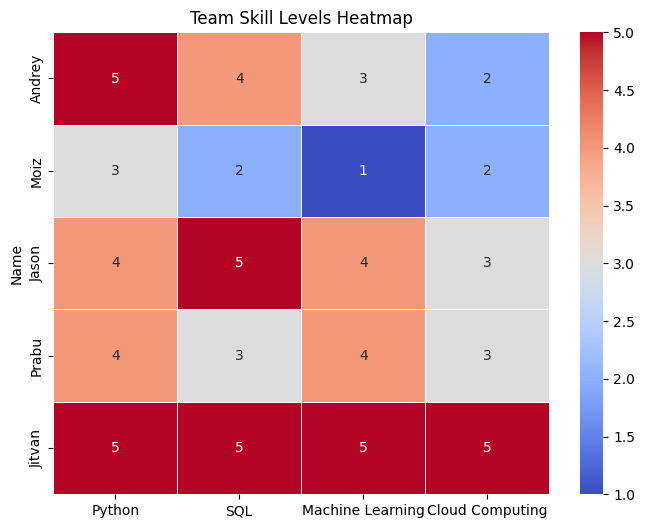

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_skills, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels Heatmap")
plt.show()